In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [2]:
# reading the data
# wine_data = pd.read_csv("wine.data", header = None)
colnames = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','dilute','Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names = colnames,index_col = False)
wine_data = pd.get_dummies(wine_data, columns=['Class'])

In [3]:
#one hot encoding and train validation split
labels = wine_data.loc[:,['Class_1','Class_2','Class_3']]
labels = labels.values
features = wine_data.drop(['Class_1','Class_2','Class_3','Ash'],axis = 1)
features = features.values
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.1,stratify = labels, random_state = 10)

In [4]:
# normalizing
train_mean = x_train.mean()
train_std = x_train.std()
x_train = ((x_train - train_mean )/train_std)
x_test = ((x_test - train_mean)/train_std)
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train,test_size = 0.1,stratify = y_train, random_state = 10)

In [5]:
# neural network datastructure
class ANN(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 12 #we have 12 features
        self.outputLayerSize = 3 #we have 3 outputs class
        self.hiddenLayerSize_1 =128 #chosen randomly
        self.hiddenLayerSize_2 =128 #chosen randomly
        self.lr = 0.0001 #a lower learning rate
        
        #random weights for three layers
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize_1)
        self.W2 = np.random.randn(self.hiddenLayerSize_1, self.hiddenLayerSize_2)
        self.W3 = np.random.randn(self.hiddenLayerSize_2, self.outputLayerSize)
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z)) 
    def determinent_sigmoid(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))  
    
    def forward_pass(self, X):
        #forward pass
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W3)
        self.y_hat= self.soft_max(self.z3.T)
        return 0
        
    def backward_pass(self,X, Y):
        #backward pass
        determinent_loss_z3 = self.y_hat.T - Y
        determinent_z33 = self.a2 
        self.determinent_w3 = np.dot(determinent_z33.T,determinent_loss_z3)
        self.determinent_w2 = np.dot((self.a1.T),(self.determinent_sigmoid(self.z2)*np.dot(determinent_loss_z3,self.W3.T)))   
        determinent_z11 = X
        determinent_loss_activation2 = np.dot(determinent_loss_z3,self.W3.T)
        determinent_z2 = self.determinent_sigmoid(self.z2)
        determinent_z1 = self.determinent_sigmoid(self.z1)
        determinent_z2_a1 = self.W2
        self.determinent_w1 = np.dot(determinent_z11.T,((determinent_loss_activation2)*(determinent_z2 * np.dot(determinent_z1,determinent_z2_a1))))
        return 0
    
    def soft_max(self,z):
        #sum = 1
        return np.exp(z) / np.sum(np.exp(z), axis=0)
   
    def update_weights(self):  
        self.W1 -= self.lr*self.determinent_w1
        self.W2 -= self.lr*self.determinent_w2
        self.W3 -= self.lr*self.determinent_w3
        
    def categorical_crossentropy(self,X,actual_label):
        self.forward_pass(X)
        self.loss = 0
        for x,y in zip(np.array(actual_label),self.y_hat.T):
            self.loss += np.sum(x*np.log(y))
        return (-1*self.loss)
        

In [6]:
#computation
epoch = 1000
validation_accuracy = []
temp_validation_loss = []
accuracy = []
validation_loss = []
my_network = ANN()
for epoch_number in range(epoch):
    validation_loss.append(my_network.categorical_crossentropy(x_train,y_train))
    count = 0
    pred_label = []
    for i in my_network.y_hat.T:
        max_value = np.max(i)
        pred_label.append(list(np.where(i==max_value,1,0)))
    for i,j in zip(np.array(y_train),pred_label):
        if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
            count +=1
    accuracy.append((count/y_train.shape[0])*100)
    my_network.backward_pass(x_train,y_train)
    my_network.update_weights()
    my_network.forward_pass(x_val)
    a , vl, c = 0, 0 , 0
    pred_label = []
    for i in my_network.y_hat.T:
        max_value = np.max(i)
        pred_label.append(list(np.where(i==max_value,1,0)))
    for i,j in zip(np.array(y_val),pred_label):
        if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
            c +=1
    a = ((c/x_val.shape[0])*100)
    vl = (my_network.categorical_crossentropy(x_val,y_val))
    validation_accuracy.append(a)
    temp_validation_loss.append(vl)

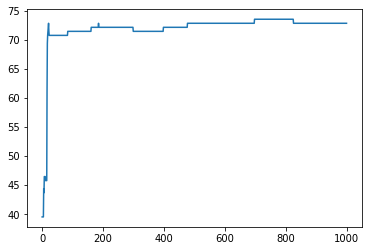

In [7]:
#results
import matplotlib.pyplot as plt
plt.plot(range(epoch),accuracy)
plt.show()

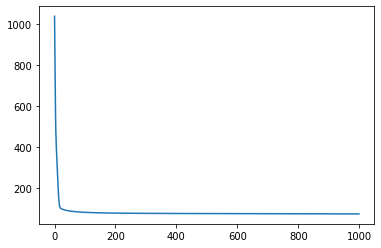

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(epoch),validation_loss)
plt.show()

In [9]:
# pred_label = []
# for i in my_network.y_hat.T:
#     max_value = np.max(i)
#     pred_label.append(list(np.where(i==max_value,1,0)))

In [11]:
# Evaluate model
my_network.forward_pass(x_test)
accuracy = []
validation_loss, c = 0, 0
pred_label = []
for i in my_network.y_hat.T:
        max_value = np.max(i)
        pred_label.append(list(np.where(i==max_value,1,0)))
for i,j in zip(np.array(y_test),pred_label):
        if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
            c +=1
accuracy, validation_loss = ((c/x_test.shape[0])*100), (my_network.categorical_crossentropy(x_test,y_test))
print ("Accuracy: "+str(accuracy)+ "%")

Accuracy: 83.33333333333334%
